# COGS 108 - Burritos of San Diego

# Overview

Mexican food is extremely popular in the United States, even more so in California due to our proximity to Mexico. The burrito is one of the staple foods of Mexican cuisine, and is enjoyed by not only its creators, but by people all around the world. However, this brings up a question: What exactly makes a good burrito? What factors come into play?

Throughout our research, we decided to pursue 3 main dimensions of a burrito: the cost, how much hunger it satisfies, and the quality of the meat in the fillings. With these 3 factors, we set out to find out how much they impact the scores and ratings of a burrito, giving us a hint on what customers value the most in their wrapped meal.

# Names

-Ethan Tao

-Haaris Waleh

-Sean Li

-Han Zhang

<a id='research_question'></a>
# Research Question

What factors can contribute to how good a taco shop’s burrito is? Are there any relationships between price, location, proximity to ingredient suppliers, etc.?

<a id='background'></a>

## Background & Prior Work

Mexican food is the second most popular cuisine in the United States.(1) Establishments span from fast food joints, to food trucks, to sit-down restaurants. With its close proximity to Mexico and its large Hispanic and Latino population, Southern California is renowned for its Mexican cuisine expertise. San Diego County alone has over 80 Mexican restaurants, specifically ones that sell our target item.(2) 

One of the most common orders at a Mexican restaurant is the burrito, a dish consisting of a flour tortilla, which is a thin type of flatbread, wrapped in a tight, cylindrical shape around an assortment of vegetables, cheese, meat, and other ingredients. The internals of a burrito may differ from restaurant to restaurant, but the bulk of taco shops include the basic three: cheese, meat, and salsa. The average cost of a burrito is around $9, but it may vary depending on the type of filling.(3)

As Scott Cole, the primary contributor to our database, says, “Contrary to popular belief, burritos do not merely exist in 3 dimensions. They transcend the physical limitations of space.”(2) In order to categorically define a “good” burrito, Cole, along with several San Diegans, established the ten “dimensions” of a burrito: volume, tortilla quality, temperature, meat quality, non-meat filling quality, the ratio between meat and non-meat filling, uniformity, salsa quality, flavor synergy, and tortilla wrap integrity.

References

1. https://www.chefspencil.com/most-popular-ethnic-cuisines-in-america/

2. https://srcole.github.io/100burritos/

3. https://www.forbes.com/sites/priceonomics/2017/04/07/how-much-do-the-ingredients-cost-in-your-favorite-foods/?sh=3e8e9dc011ed

# Hypothesis


Traffic and customers are important for a store to live, after this project, we should be able to predict whether or not burrito stores are able to make money based on their location. Since price and filling are also important parts for a burrito, we may also find out if there is any relationship between customer satisfaction with their burritos. The majority of burritos consumed in this dataset contain meat, so our primary filling focus will be on meat.

We expect price be the most important part of a burrito store, hunger will be the second one and filling being the third important one for a customer enjoy a specific burrito.

## Dataset

- Dataset Name: Burritos of San Diego
- Link to the dataset: https://docs.google.com/spreadsheets/d/18HkrklYz1bKpDLeL-kaMrGjAhUM6LeJMIACwEljCgaw/edit?usp=sharing
- Number of observations: 424

The data we need would be customers’ feedback from yelp and google, with the burrito store’s location, how is the surrounding area, the price and suppliers for the burrito, how much and what can I choose to be in my burrito. These data can be accessed through the links provided in the background, and would be organized and analyzed. Having many sets of observations is preferable, and will greatly increase the validity of our data.

Comparing the categories with each other and taking into account certain data will allow us to get a good understanding of our research question.


# Setup

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
burritos = pd.read_csv("burritodata.csv")
burritos

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Valentine's Mexican Food,Al Pastor,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Valentine's Mexican Food,Chile Relleno,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,Valentine's Mexican Food,California,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Valentine's Mexican Food,Shrimp,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

There's some inconsistencies with spelling, so we want to fix that. We also want to fill in the in the NaN cells, since they were left empty if the restaurant had been ordered from previously.

In [2]:
# Manually fixing some of the addresses :/
# Difficult to use code, faster to just do it by hand
burritos.loc[burritos.Location == "Valentines Mexican Food", 'Location'] = "Valentine's Mexican Food"
burritos.loc[burritos.Location == "California burritos", 'Location'] = "California Burritos"
burritos.loc[burritos.Location == "Donato's taco shop", 'Location'] = "Donato's Taco Shop"
burritos.loc[burritos.Location == "Alberto's 623 N Escondido Blvd, Escondido, CA 92025", 'Location'] = "Alberto's Mexican Food"
burritos.loc[burritos.Location == "Alberto's Mexican Food", 'Address'] = "623 N Escondido Blvd, Escondido, CA 92025"
burritos.loc[burritos.Location == "Alberto's Mexican Food", 'Neighborhood'] = "Escondido"
burritos.loc[burritos.Location == "Taco stand", 'Location'] = "The Taco Stand"
burritos.loc[burritos.Location == "Taco Stand", 'Location'] = "The Taco Stand"
burritos.loc[burritos.Location == "Vallarta express", 'Location'] = "Vallarta Express"
burritos.loc[burritos.Location == "MXN on Washington", 'Address'] = "719 W Washington St, San Diego, CA 92103"
burritos.loc[burritos.Location == "Lolita's", 'Location'] = "Lolita's Taco Shop"
burritos.loc[burritos.Location == "Lolita's Taco shop", 'Location'] = "Lolita's Taco Shop"
burritos.loc[burritos.Location == "Lolita's taco shop", 'Location'] = "Lolita's Taco Shop"
burritos.loc[burritos.Location == "Los tacos", 'Location'] = "Los Tacos"
burritos.loc[burritos.Location == "Kotija Jr", 'Location'] = "Kotija Jr."

# Filling in the NaNs for multiple orders of the same restaurant
# Creating a dictionary to hold one column for each restaurant
addresses = dict()
neighborhoods = dict()
# urls = dict()
yelp = dict()
google = dict()
# Iterating through DataFrame to fill the dictionaries
for index, row in burritos.iterrows():
    if row['Location'] not in addresses and not pd.isnull(row['Address']):
        addresses[row['Location']] = row['Address']
    if row['Location'] not in neighborhoods and not pd.isnull(row['Neighborhood']):
        neighborhoods[row['Location']] = row['Neighborhood']
    # if row['Location'] not in urls and not pd.isnull(row['URL']):
        # urls[row['Location']] = row['URL']
    if row['Location'] not in yelp and not pd.isnull(row['Yelp']):
        yelp[row['Location']] = row['Yelp']
    if row['Location'] not in google and not pd.isnull(row['Google']):
        google[row['Location']] = row['Google'] 
# Replacing the NaNs to match everything
for key in addresses:
    burritos.loc[burritos.Location == key, 'Address'] = addresses[key]
for key in neighborhoods:
    burritos.loc[burritos.Location == key, 'Neighborhood'] = neighborhoods[key]
# for key in urls:
    # burritos.loc[burritos.Location == key, 'URL'] = urls[key]
for key in yelp:
    burritos.loc[burritos.Location == key, 'Yelp'] = yelp[key]
for key in google:
    burritos.loc[burritos.Location == key, 'Google'] = google[key]

We don't need the chips column or URL column, so it would be best to get rid of them. Likewise, mass and density is sparesely included, so we will drop those as well.

In [3]:
# Dropping the chips 
burritos = burritos.drop(columns=['Chips','URL', 'Mass (g)', 'Density (g/mL)', 'Unreliable'])

The type of filling selection is simply marked by an X. We need to change this to true and false values.

In [4]:
burritos.update(burritos[['Beef','Pico','Guac','Cheese','Fries','Sour cream','Pork','Chicken','Shrimp','Fish','Rice','Beans','Lettuce','Tomato','Bell peper','Carrots','Cabbage','Sauce','Salsa','Cilantro','Onion','Taquito','Pineapple','Ham','Chile relleno','Nopales','Lobster','Queso','Egg','Mushroom','Bacon','Sushi','Avocado','Corn','Zucchini','NonSD']].fillna(False))
burritos.replace(['x','X'], True)
burritos['Volume'].unique()

array([ nan, 0.77, 0.7 , 0.78, 0.96, 0.93, 0.95, 0.81, 0.73, 0.82, 0.88,
       0.65, 0.9 , 0.84, 0.91, 0.85, 0.89, 1.05, 1.01, 1.07, 0.74, 0.83,
       0.75, 0.94, 0.68, 0.57, 0.5 , 0.92, 0.51, 0.79, 0.6 , 1.17, 0.55,
       0.54, 0.87, 0.86, 0.97, 0.72, 0.76, 0.62, 0.64, 0.67, 0.66, 0.69,
       1.  , 0.8 , 0.63, 0.56, 0.59, 1.24, 0.71, 0.58, 1.16, 0.4 , 0.61,
       1.08, 0.41, 0.99, 1.54, 0.47, 1.03, 1.09, 0.98, 0.52, 1.02])

We noticed the many of the reviews for burritos did not include the dimensions. Instead of removing them entirely, we created two new data frames, one that has reviews that included dimensions and one that has reviews that excluded dimensions.

In [5]:
burritos_with_dim = burritos.loc[~burritos['Volume'].isna()]
burritos_without_dim = burritos.loc[burritos['Volume'].isna()]

In [6]:
burritos_with_dim

,Location,Burrito,Date,Neighborhood,Address,Yelp,Google,Cost,Hunger,Length,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
73,Jorge's Mexicatessen,California,4/24/2016,Encinitas,267 N El Camino Real,4.0,4.5,5.95,3.5,20.0,...,False,False,0.0,False,False,False,False,False,False,False
75,Senor Grubby's,California,4/24/2016,Carlsbad,377 Carlsbad Village Dr,4.0,4.1,9.00,2.0,19.0,...,False,False,0.0,False,False,False,False,False,False,False
76,Senor Grubby's,Pastor,4/24/2016,Carlsbad,377 Carlsbad Village Dr,4.0,4.1,9.00,2.0,18.5,...,False,False,0.0,False,False,False,False,False,False,False
78,Mi Asador Mexican & Seafood,California,4/27/2016,Oceanside,4750 Oceanside Blvd,4.5,4.4,6.89,3.0,25.0,...,False,False,0.0,False,False,False,False,False,False,False
79,Mi Asador Mexican & Seafood,El Hawaiiano,4/27/2016,Oceanside,4750 Oceanside Blvd,4.5,4.4,6.39,3.0,23.0,...,False,False,0.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Valentine's Mexican Food,Al Pastor,8/27/2019,Downtown,1157 Sixth Ave,4.0,4.0,6.00,1.0,17.0,...,False,False,0.0,False,False,False,False,False,False,False
419,Valentine's Mexican Food,Chile Relleno,8/27/2019,Downtown,1157 Sixth Ave,4.0,4.0,6.00,4.0,19.0,...,False,False,0.0,False,False,False,False,False,False,False
420,Valentine's Mexican Food,California,8/27/2019,Downtown,1157 Sixth Ave,4.0,4.0,7.90,3.0,20.0,...,False,False,0.0,False,False,False,False,False,False,False
421,Valentine's Mexican Food,Shrimp,8/27/2019,Downtown,1157 Sixth Ave,4.0,4.0,7.90,3.0,22.5,...,False,False,0.0,False,False,False,False,False,False,False


In [7]:
burritos_without_dim

,Location,Burrito,Date,Neighborhood,Address,Yelp,Google,Cost,Hunger,Length,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's Taco Shop,California,1/18/2016,Miramar,6780 Miramar Rd,3.5,4.2,6.49,3.0,NaN,...,False,False,0.0,False,False,False,False,False,False,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,3.5,3.3,5.45,3.5,NaN,...,False,False,0.0,False,False,False,False,False,False,False
2,Oscar's Mexican food,Carnitas,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,3.5,3.3,4.85,1.5,NaN,...,False,False,0.0,False,False,False,False,False,False,False
3,Oscar's Mexican food,Carne asada,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,3.5,3.3,5.25,2.0,NaN,...,False,False,0.0,False,False,False,False,False,False,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,4.0,3.8,6.59,4.0,NaN,...,False,False,0.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Taco Villa,Carne asada,8/25/2017,UTC,9500 Gilman Dr,3.5,3.5,6.99,3.5,NaN,...,False,False,0.0,False,False,False,False,False,False,False
386,Lolita's Taco Shop,California,1/2/2018,Kearny Mesa,7305 Clairemont Mesa Blvd,4.0,4.4,7.25,4.0,NaN,...,False,False,0.0,False,False,False,False,False,False,False
387,El Patron,Breakfast,1/9/2018,National City,5065 Logan Ave,4.5,3.8,4.19,3.0,NaN,...,False,False,0.0,x,False,False,False,False,False,False
388,La Posta de Acapulco,California,1/12/2018,Hillcrest,3980 Third Ave,3.5,4.3,7.00,5.0,NaN,...,False,False,0.0,False,False,False,False,False,False,False


Finally, we sort the DataFrame by restaurant instead of date.

In [8]:
burritos = burritos.sort_values(by='Location').reset_index()
burritos_with_dim = burritos_with_dim.sort_values(by='Location').reset_index()
burritos_without_dim = burritos_without_dim.sort_values(by='Location').reset_index()
burritos

,index,Location,Burrito,Date,Neighborhood,Address,Yelp,Google,Cost,Hunger,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,148,Albertacos,Carne asada,6/8/2016,San Marcos,500 W San Marcos Blvd # 103,3.5,3.9,5.25,4.0,...,False,False,0.0,False,False,False,False,False,False,False
1,147,Albertacos,California,6/8/2016,San Marcos,500 W San Marcos Blvd # 103,3.5,3.9,5.70,3.5,...,False,False,0.0,False,False,False,False,False,False,False
2,131,Alberto's Mexican Food,Carne Asada,5/5/2016,Escondido,"623 N Escondido Blvd, Escondido, CA 92025",NaN,NaN,4.59,4.0,...,False,False,0.0,False,False,False,False,False,False,False
3,383,Burrito Box,Steak with guacamole,12/16/2017,New York,885 9th Ave,4.0,4.5,11.50,3.5,...,False,False,0.0,False,False,False,False,False,False,False
4,362,Burrito Factory,Steak everything,7/13/2017,Austin,2025 Guadalupe St,4.5,4.8,7.35,3.5,...,False,False,0.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,356,Vallarta Express,Surf & Turf,6/24/2017,Clairemont,4277 Genesee Ave,3.5,4.0,8.55,3.0,...,False,False,0.0,False,False,False,False,False,False,False
419,357,Vallarta Express,California,6/24/2017,Clairemont,4277 Genesee Ave,3.5,4.0,7.80,2.5,...,False,False,0.0,False,False,False,False,False,False,False
420,89,Vallarta Express,California,5/9/2016,Clairemont,4277 Genesee Ave,3.5,4.0,6.95,4.0,...,False,False,0.0,False,False,False,False,False,False,False
421,48,Vallarta Express,Surf and turf,3/21/2016,Clairemont,4277 Genesee Ave,3.5,4.0,7.65,3.0,...,False,False,0.0,False,False,False,False,False,False,False


# Data Analysis & Results

Because our data is comprised of written reviews, the overall scores given for each are subjective and may contribute to some bias. Some variables may be linked to others. We want to see if there are any individual factors that affect a review. We chose to do linear regression because we wanted to find relationships between continuous variables.

Since the reviewers included hunger, we want to determine the relationship between hunger and overall ratings of burrito restaurants. The null hypothesis here would be that there is no relationship between hunger and overall ratings.

In [9]:
outcome1, predictors1 = patsy.dmatrices('Hunger ~ overall', burritos)
model1 = sm.OLS(outcome1, predictors1)
res_1 = model1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Hunger   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.65
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           0.000705
Time:                        22:14:53   Log-Likelihood:                -499.83
No. Observations:                 418   AIC:                             1004.
Df Residuals:                     416   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8535      0.192     14.855      0.0

Using an alpha of 0.01, we reject our hypothesis and there is a relationship between hunger levels of our reviewers and overall rating of the burrito they consumed. Here's our plot.

Text(0.5, 1.0, 'Does Hunger Level of Reviewers Predict the Rating?')

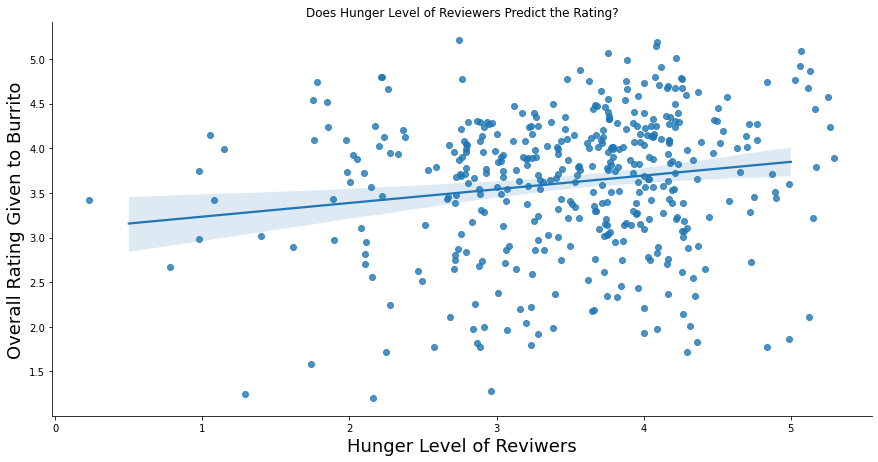

In [10]:
sns.lmplot(x='Hunger', y='overall', 
           data=burritos, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.3, y_jitter=.3)
plt.xlabel('Hunger Level of Reviwers', size=18)
plt.ylabel('Overall Rating Given to Burrito', size=18)
plt.title('Does Hunger Level of Reviewers Predict the Rating?')

We can also take a look there is a relationship between cost and overall rating. The null hypothesis here would be that there is no relationship between cost and overall rating.

In [11]:
outcome2, predictors2 = patsy.dmatrices('Cost ~ overall', burritos)
model2 = sm.OLS(outcome2, predictors2)
res_2 = model2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.450
Date:                Wed, 09 Jun 2021   Prob (F-statistic):             0.0200
Time:                        22:14:54   Log-Likelihood:                -753.94
No. Observations:                 414   AIC:                             1512.
Df Residuals:                     412   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2381      0.363     17.196      0.0

Using an alpha level of 0.01, we fail to reject our hypothesis. The cost of the burrito does not significantly predict the overall rating of it. Here's our plot.

Text(0.5, 1.0, 'Does the Cost of Burrito Predict the Rating?')

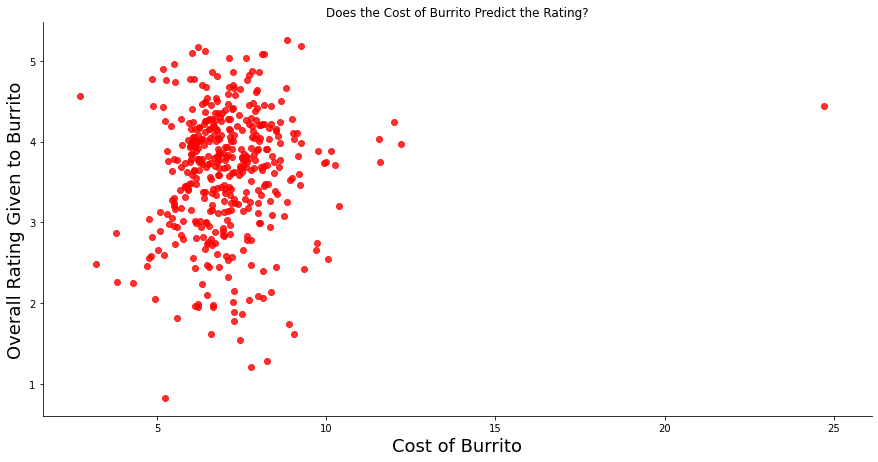

In [12]:
sns.lmplot(x='Cost', y='overall', 
           data=burritos, fit_reg=False, 
           height=6, aspect=2, 
           x_jitter=.3, y_jitter=.3, 
           line_kws = {'color': 'red'},
           scatter_kws = {'color': 'red'})
plt.xlabel('Cost of Burrito', size=18)
plt.ylabel('Overall Rating Given to Burrito', size=18)
plt.title('Does the Cost of Burrito Predict the Rating?')

As we can see, there is a significant outlier on the far right of our data. (Why would someone order a $25 burrito? That's like 3 burritos.) Looking at our graphs, there doesn't seem to be any classifiable distributions in our data regarding cost, hunger levels, and overall rating.

We would also like to see if there is any correlation between our burrito meat and the overall rating given to that specific burrito, as per our hypothesis. The null hypothesis here would be that there is no relationship between meat and overall rating

In [13]:
outcome3, predictors3 = patsy.dmatrices('Meat ~ overall', burritos)
model3 = sm.OLS(outcome3, predictors3)
res_3 = model3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Meat   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     463.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           4.96e-69
Time:                        22:14:54   Log-Likelihood:                -345.68
No. Observations:                 407   AIC:                             695.4
Df Residuals:                     405   BIC:                             703.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6974      0.139      5.027      0.0

Using an alpha level of 0.01, we reject our hypothesis. There is a relationship between the meat rating the reviewer gave to their burrito and the overall rating they gave to it.

Text(0.5, 1.0, 'Does the Meat Rating of Burrito Predict the Overall Rating?')

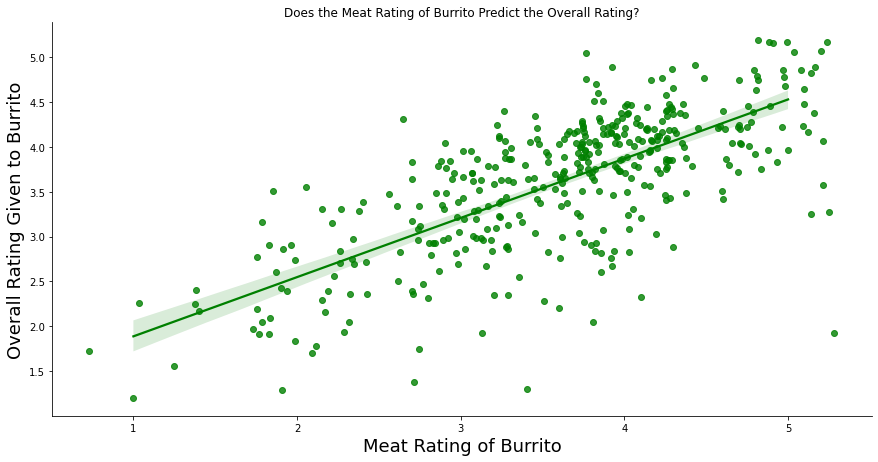

In [14]:
sns.lmplot(x='Meat', y='overall', 
           data=burritos, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.3, y_jitter=.3, 
           line_kws = {'color': 'green'},
           scatter_kws = {'color': 'green'})
plt.xlabel('Meat Rating of Burrito', size=18)
plt.ylabel('Overall Rating Given to Burrito', size=18)
plt.title('Does the Meat Rating of Burrito Predict the Overall Rating?')

Finally, let's take a look at the rankings of restaurants based on the different the different rating categories. Since there are several restaurants that have very few reviews, we will only look at restaurants with 5 or more reviews in the burritos DataFrame. However, for volume ratings, we need to use the burritos_with_dim DataFrame to find restaurants with 5 or more reviews.

In [15]:
mean_burritos_rating = burritos.groupby('Location').mean()
mean_burritos_rating['NumberOfRestaurants'] = burritos['Location'].value_counts()
mean_burritos_rating = mean_burritos_rating.loc[mean_burritos_rating.NumberOfRestaurants > 4]
mean_burritos_dim = burritos_with_dim.groupby('Location').mean()
mean_burritos_dim['NumberOfRestaurants'] = burritos_with_dim['Location'].value_counts()
mean_burritos_dim = mean_burritos_dim.loc[mean_burritos_dim.NumberOfRestaurants > 4]
mean_burritos_rating

,index,Yelp,Google,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Synergy,Wrap,overall,Queso,NumberOfRestaurants
Location,,,,,,,,,,,,,,,,,,,
California Burrito Company,255.200000,3.5,4.4,5.900000,3.200000,19.000000,21.300000,0.686000,3.100000,4.200000,3.300000,2.900000,2.600000,3.000000,3.400000,4.600000,3.200000,0.0,5
California Burritos,189.379310,4.5,4.4,6.317241,3.924483,22.252381,21.457143,0.823333,3.941379,3.544828,4.103448,3.975000,3.991071,3.862069,4.089655,4.355172,4.203704,0.0,29
Cancun Mexican & Seafood,185.166667,4.5,4.1,6.733333,3.716667,19.500000,21.750000,0.735000,4.050000,4.500000,3.833333,3.900000,3.916667,3.416667,3.800000,3.916667,4.100000,0.0,6
El Zarape,179.000000,4.0,4.4,6.775000,3.175000,17.500000,21.125000,0.620000,3.500000,4.333333,3.750000,3.545000,4.025000,3.810000,3.540000,4.700000,3.573333,0.0,10
Lolita's Taco Shop,130.357143,4.0,4.4,7.226923,3.285714,17.642222,22.913889,0.747778,3.114286,3.450000,3.416667,3.814286,3.491667,3.135714,3.567857,4.071429,3.407143,0.0,14
Los Primos Mexican Food,133.666667,3.0,3.7,7.466667,3.375000,20.214286,21.607143,0.761429,3.333333,3.500000,2.958333,3.250000,2.083333,2.863636,2.666667,3.416667,2.758333,0.0,12
Los Tacos,311.000000,NaN,NaN,8.050000,3.241667,21.050000,22.600000,0.856000,3.766667,4.250000,4.258333,3.858333,3.825000,3.741667,4.225000,4.150000,4.208333,0.0,12
Los Tacos 2,361.600000,4.5,5.0,8.740000,3.960000,22.100000,21.400000,0.806000,3.900000,4.375000,3.350000,3.200000,2.700000,2.600000,3.340000,3.000000,3.480000,0.0,5
Lucha Libre North Park,207.500000,3.5,4.3,7.587500,3.489286,18.979167,23.320833,0.827083,3.678571,3.200000,3.612000,3.364286,3.480000,3.185714,3.314286,4.014286,3.264286,0.0,28


In [16]:
mean_burritos_dim

,index,Yelp,Google,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Synergy,Wrap,overall,Queso,NumberOfRestaurants
Location,,,,,,,,,,,,,,,,,,,
California Burrito Company,255.200000,3.5,4.4,5.900000,3.200000,19.000000,21.300000,0.686000,3.100000,4.200000,3.300000,2.900000,2.600000,3.000000,3.400000,4.600000,3.200000,0.0,5
California Burritos,213.619048,4.5,4.4,6.271429,3.952381,22.252381,21.457143,0.823333,3.919048,3.276190,4.047619,4.014286,3.964286,3.857143,4.004762,4.157143,4.105000,0.0,21
Lolita's Taco Shop,122.666667,4.0,4.4,7.133333,3.077778,17.642222,22.913889,0.747778,3.200000,3.533333,3.312500,3.688889,3.112500,3.155556,3.250000,3.722222,3.155556,0.0,9
Los Primos Mexican Food,154.857143,3.0,3.7,7.014286,3.142857,20.214286,21.607143,0.761429,3.571429,3.214286,2.642857,2.714286,1.642857,2.416667,2.142857,3.857143,2.271429,0.0,7
Los Tacos,309.100000,NaN,NaN,8.080000,3.290000,21.050000,22.600000,0.856000,3.670000,4.200000,4.210000,3.830000,3.640000,3.740000,4.220000,4.180000,4.150000,0.0,10
Los Tacos 2,361.600000,4.5,5.0,8.740000,3.960000,22.100000,21.400000,0.806000,3.900000,4.375000,3.350000,3.200000,2.700000,2.600000,3.340000,3.000000,3.480000,0.0,5
Lucha Libre North Park,208.083333,3.5,4.3,7.508333,3.491667,18.979167,23.320833,0.827083,3.766667,3.362500,3.676190,3.429167,3.480952,3.125000,3.408333,4.016667,3.291667,0.0,24
Lupe's Taco Shop,316.833333,3.5,4.5,8.360000,3.733333,20.250000,25.500000,1.085000,3.500000,3.833333,3.766667,3.416667,3.083333,1.966667,3.316667,3.450000,3.541667,0.0,6
Rigoberto's Taco Shop,225.941176,4.0,4.4,6.738235,3.800000,22.805882,22.629412,0.933529,3.882353,4.182353,3.740000,3.752941,4.062500,3.829412,3.855882,3.823529,3.894118,0.0,17


In [17]:
print('Top 5 Restaurant Ratings: Overall')
print(mean_burritos_rating.sort_values(by=['overall'],ascending=False)['overall'].head(5))

Top 5 Restaurant Ratings: Overall
Location
Valentine's Mexican Food    4.219444
Los Tacos                   4.208333
California Burritos         4.203704
The Taco Stand              4.200000
Cancun Mexican & Seafood    4.100000
Name: overall, dtype: float64


In [18]:
print('Top 5 Restaurant Ratings: Volume')
print(mean_burritos_dim.sort_values(by=['Volume'],ascending=False)['Volume'].head(5))

Top 5 Restaurant Ratings: Volume
Location
Lupe's Taco Shop                 1.085000
Rigoberto's Taco Shop            0.933529
Los Tacos                        0.856000
Roberto's Taco Shop Hillcrest    0.840000
Lucha Libre North Park           0.827083
Name: Volume, dtype: float64


In [19]:
print('Top 5 Restaurant Ratings: Tortilla')
print(mean_burritos_rating.sort_values(by=['Tortilla'],ascending=False)['Tortilla'].head(5))

Top 5 Restaurant Ratings: Tortilla
Location
Valentine's Mexican Food    4.083333
Cancun Mexican & Seafood    4.050000
California Burritos         3.941379
Los Tacos 2                 3.900000
The Taco Stand              3.840000
Name: Tortilla, dtype: float64


In [20]:
print('Top 5 Restaurant Ratings: Temperature')
print(mean_burritos_rating.sort_values(by=['Temp'],ascending=False)['Temp'].head(5))

Top 5 Restaurant Ratings: Temperature
Location
Cancun Mexican & Seafood    4.500000
Los Tacos 2                 4.375000
El Zarape                   4.333333
Los Tacos                   4.250000
Valentine's Mexican Food    4.205556
Name: Temp, dtype: float64


In [21]:
print('Top 5 Restaurant Ratings: Meat')
print(mean_burritos_rating.sort_values(by=['Meat'],ascending=False)['Meat'].head(5))

Top 5 Restaurant Ratings: Meat
Location
The Taco Stand              4.340000
Los Tacos                   4.258333
Valentine's Mexican Food    4.205882
California Burritos         4.103448
Rigoberto's Taco Shop       3.873913
Name: Meat, dtype: float64


In [22]:
print('Top 5 Restaurant Ratings: Non-Meat')
print(mean_burritos_rating.sort_values(by=['Fillings'],ascending=False)['Fillings'].head(5))

Top 5 Restaurant Ratings: Non-Meat
Location
Valentine's Mexican Food    4.041176
The Taco Stand              4.040000
California Burritos         3.975000
Cancun Mexican & Seafood    3.900000
Los Tacos                   3.858333
Name: Fillings, dtype: float64


In [23]:
print('Top 5 Restaurant Ratings: Meat to Filling Ratio')
print(mean_burritos_rating.sort_values(by=['Meat:filling'],ascending=False)['Meat:filling'].head(5))

Top 5 Restaurant Ratings: Meat to Filling Ratio
Location
Valentine's Mexican Food         4.161111
Rigoberto's Taco Shop            4.083333
El Zarape                        4.025000
Roberto's Taco Shop Hillcrest    4.000000
California Burritos              3.991071
Name: Meat:filling, dtype: float64


In [24]:
print('Top 5 Restaurant Ratings: Uniformity')
print(mean_burritos_rating.sort_values(by=['Uniformity'],ascending=False)['Uniformity'].head(5))

Top 5 Restaurant Ratings: Uniformity
Location
The Taco Stand              3.920000
California Burritos         3.862069
El Zarape                   3.810000
Valentine's Mexican Food    3.766667
Los Tacos                   3.741667
Name: Uniformity, dtype: float64


Since there are empty Salsa cells (now filled with False values), presumably because the reviewer ordered a burrito without salsa, we will rank the salsa based on the rows have salsa rated.

In [25]:
# For some reason, pd could not calculate the mean of the Salsa column. We couldn't figure out exactly why,
# and calling burritos['Salsa'].unique() only showed floats, but the dtype was still an object.
# This function basically forces everything to be a float, and then we take the average Salsa rating over
# each restaurant.
def to_float(x):
    return float(x)
salsa_burritos = burritos.loc[burritos['Salsa'] != False]
salsa_burritos = salsa_burritos[['Location', 'Salsa']]
salsa_burritos['Salsa'] = salsa_burritos['Salsa'].apply(to_float)
salsa_burritos['Salsa'].dtype
mean_burritos_salsa = salsa_burritos.groupby('Location').mean()
mean_burritos_salsa['NumberOfRestaurants'] = salsa_burritos['Location'].value_counts()
mean_burritos_salsa = mean_burritos_salsa.loc[mean_burritos_salsa.NumberOfRestaurants > 4]
print('Top 5 Restaurant Ratings: Salsa')
print(mean_burritos_salsa.sort_values(by=['Salsa'],ascending=False)['Salsa'].head(5))

Top 5 Restaurant Ratings: Salsa
Location
Lucha Libre North Park      3.925926
Los Tacos                   3.875000
The Taco Stand              3.848000
Valentine's Mexican Food    3.750000
California Burritos         3.550000
Name: Salsa, dtype: float64


In [26]:
print('Top 5 Restaurant Ratings: Filling Synergy')
print(mean_burritos_rating.sort_values(by=['Synergy'],ascending=False)['Synergy'].head(5))

Top 5 Restaurant Ratings: Filling Synergy
Location
The Taco Stand              4.292000
Los Tacos                   4.225000
California Burritos         4.089655
Valentine's Mexican Food    4.022222
Rigoberto's Taco Shop       3.902000
Name: Synergy, dtype: float64


In [27]:
print('Top 5 Restaurant Ratings: Wrap Integrity')
print(mean_burritos_rating.sort_values(by=['Wrap'],ascending=False)['Wrap'].head(5))

Top 5 Restaurant Ratings: Wrap Integrity
Location
El Zarape                        4.700000
California Burrito Company       4.600000
California Burritos              4.355172
Roberto's Taco Shop Hillcrest    4.260000
Los Tacos                        4.150000
Name: Wrap, dtype: float64


# Ethics & Privacy

The data set we are using is provided by a data scientist on a public Github repository. The data is publicly available and free, so there shouldn't be any problems with using or accessing it. Fundamentally, this data is very subjective because it deals with taste. However, we believe that there are steps taken to reduce the impact of subjectivity. Since we do not know the people who reviewed the burritos, we cannot evaluate how impartial they are or what biases they may have. It is possible that there are some group wide biases that significantly affect the data. If we come across what appears to be bias during our analysis, we will work together to understand and work around it. If necessary, we will contact the teaching staff to ask for advice. If we cannot do anything to resolve the issue, we will make sure that it is clear that we are aware of the issue and what it may imply during the communication of our analysis. 

We do not anticipate that our analysis will raise any controversy or that it will violate privacy. This is because the data does not contain any information that can actually be used to identify people involved and the subject matter is not considered offensive or sensitive. Some possible outcomes of our analysis is that some burrito locations will gain popularity while others lose popularity, or that burrito restaurants will use our findings to improve their offerings.

# Conclusion & Discussion

Overall, the analysis gave us a good idea of what factors influence a burrito’s rating, and what people look and value for in the meal. Our hypothesis was mostly proven by the dataset, although not completely what we expected.

As we can see in our data analysis, there is some relationship between people’s hunger level with the overall rating of the burrito. When people experience a higher hunger level, they seem to provide their burrito a higher rating. This is what we predicted, but the relationship seems lower than we expected. They say “hunger is the best spice”, but as it turns out there are a lot more factors to consider as well. A closer relationship can be found between the meat rating of burrito and the overall rating of the burrito. This is also what we expected, since the meat is usually considered the “main” part of a burrito. It would make sense that the quality of the meat dictates customer satisfaction. Furthermore, We did not see a relationship between cost of burrito and overall rating of the burrito. This can be attributed to most burritos being at an average price of $8-$9, so price doesn’t really have a big impact on whether or not the burrito is good. It is good to note here that an increase in price also corresponds to higher expectations of the burrito. For example, there was an outlier of a burrito costing $25 (lobster burrito). If one were to spend that much money on a burrito, their expectations will be fairly high. This could impact ratings and create bias since the customer already has high (or low, depending on price) of the burrito. People are subjective to the rating, the result might be biased, so we also provide some ratings for burrito stores within different categories(overall, volume, tortilla, temperature, meat, non-meat, meat to Filling Ratio and uniformity).

There were some limitations to the project, mainly, our dataset. Since the dataset is a contribution by many people, there may be different ratings and biases for each individual. For example, one person may rate a fish burrito higher because they like seafood, while another rates it lower because they dislike it. In addition, the dataset could be considered small, compared to a large dataset of thousands of values. 
This work provides an insight into what people value in a burrito. This could prove useful to both the restaurant and the customers. The restaurants would know where to place more value in their burritos, and customers would be able to know which restaurants have high ratings, and decide where to eat at.

# Team Contributions

-Ethan Tao: Hypothesis, Background, Dataset

-Haaris Waleh: Dataset, EDA

-Sean Li: Dataset, EDA

-Han Zhang: EDA, Conclusion